# Mod 2 Multiple Linear Regression Project Office Hours

- online-ds-ft-070620
- 08/25/20 - ...

# OVERVIEW OF OSEMiN

#### Resources

- **[OSEMN Data Science Workflow Notebook](https://github.com/jirvingphd/fsds-osemn-workflow)**
    - `student_OSEMN.ipynb`: also included in notes repo

> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Standardize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:2em;color:red;">
DELETE ABOVE THIS LINE FROM YOUR FINAL NOTEBOOK
</div>

# Multiple Regression Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

In [1]:
# !pip install -U fsds
from fsds.imports import *
pd.set_option('display.max_columns',0)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

fsds v0.2.23 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [113]:
# fs.ihelp_menu(fn.get_bad_coeffs_list)

In [109]:
import inspect
from IPython.display import Markdown, display
import ex_funcs as fn

def show_source(func):
    txt  = inspect.getsource(func)
    display(Markdown('```python\n'+txt +"\n```"))

In [111]:
# show_source(fn.get_bad_coeffs_list)

In [2]:
# Load in ames dataset
df = fs.datasets.load_ames_train(subset=False)
df.set_index('Id',inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# SCRUB

In [4]:
df.shape

(1460, 80)

In [5]:
cat_cols = df.select_dtypes('object').columns
df[cat_cols].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


# EXPLORE

In [7]:
# pd.to_numeric()

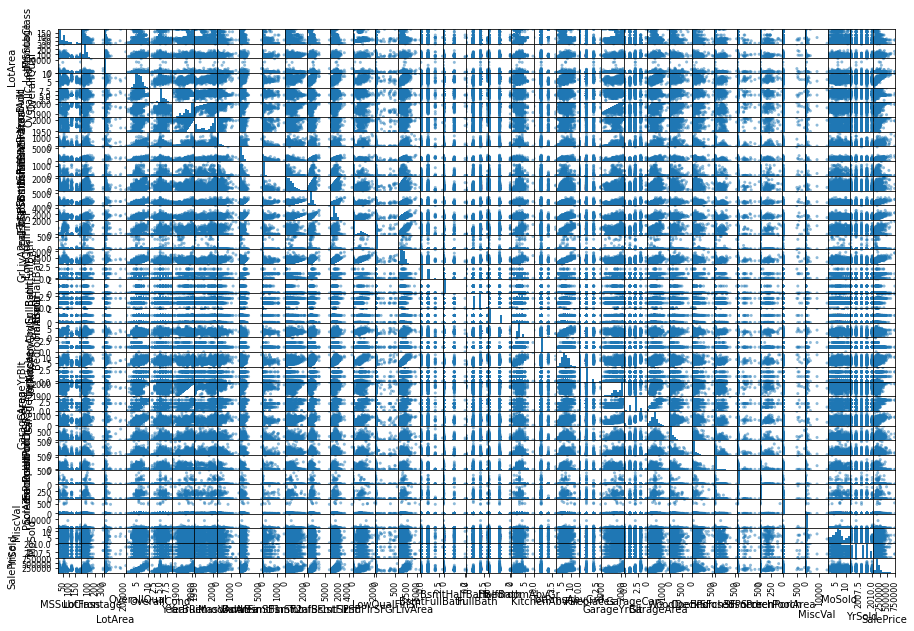

In [8]:
plt.rcParams['figure.figsize'] = (15,10)
pd.plotting.scatter_matrix(df);

<AxesSubplot:xlabel='SalePrice'>

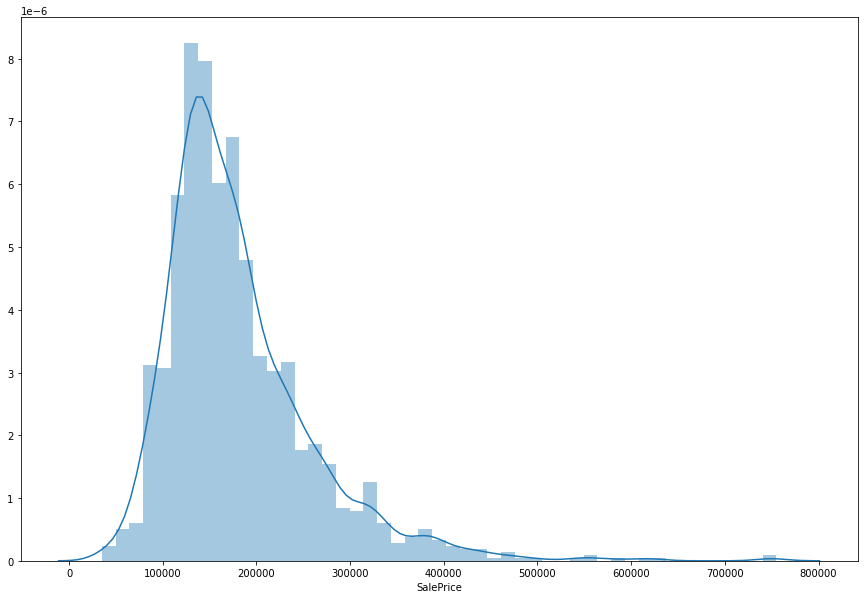

In [9]:
target= 'SalePrice'
sns.distplot(df[target])

In [10]:
num_cols = list(df.select_dtypes('number').columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

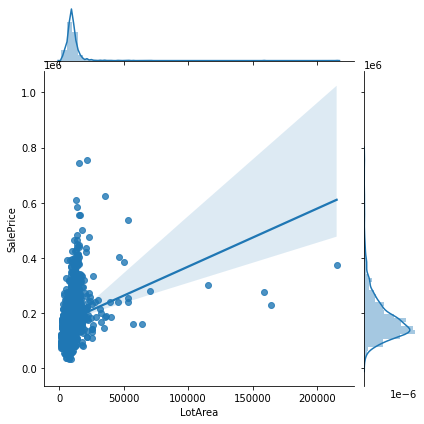

In [11]:
g = sns.jointplot(data=df,x='LotArea',y=target,kind='reg')
fig = g.fig
ax  = fig.get_axes()

In [12]:
# ax.set_title('Title')
# fig

<AxesSubplot:ylabel='SalePrice'>

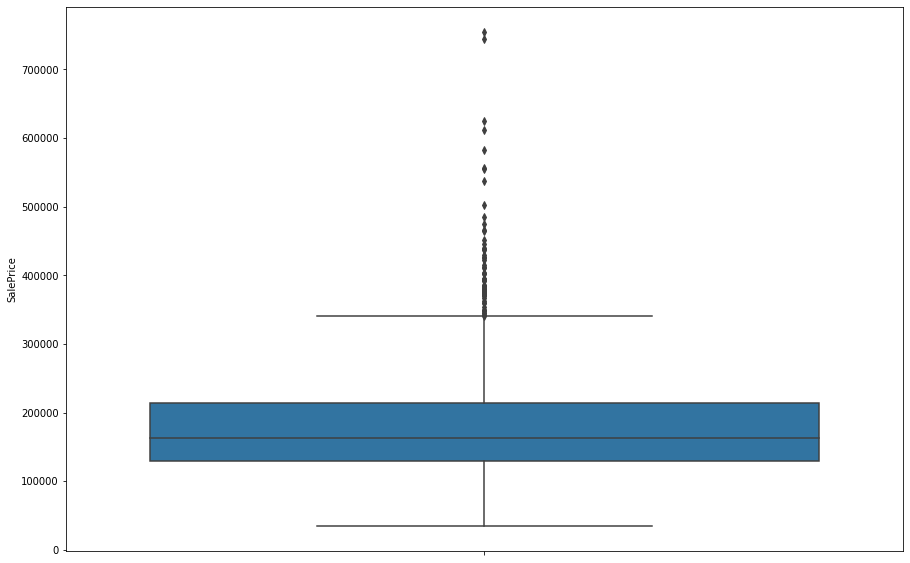

In [13]:
sns.boxplot(y=df[target])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

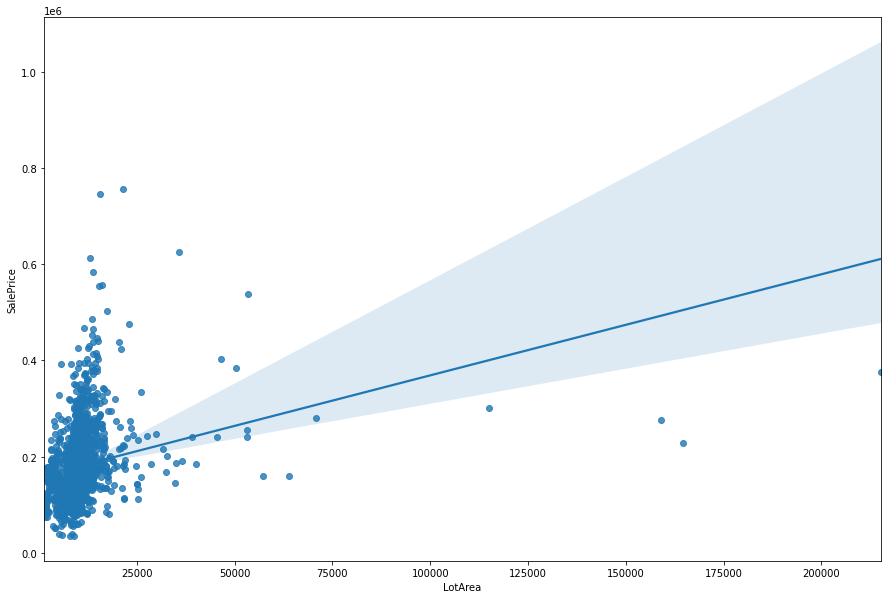

In [14]:
sns.regplot(data=df,x='LotArea',y=target)

In [15]:
def plot_col(df,col,target='SalePrice'):
    g = sns.jointplot(data=df,x=col,y=target,kind='reg')
    plt.suptitle(f"{col} vs {target}")
    return g


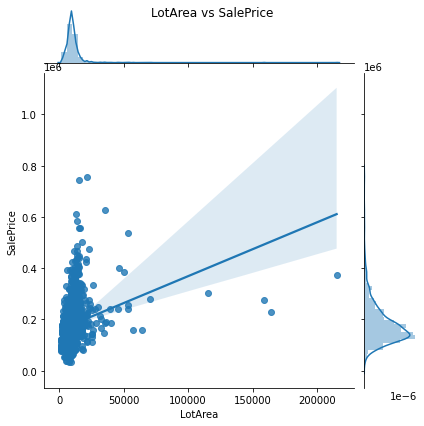

In [16]:
plot_col(df,'LotArea')

In [17]:
from ipywidgets import interact

In [18]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(df,col)

interactive(children=(Dropdown(description='col', options=('MSSubClass', 'LotFrontage', 'LotArea', 'OverallQua…

- Condition: Category? 

# MODEL

In [19]:
nulls = df.isna().sum()
only_nulls= nulls[ nulls>0]/len(df)
only_nulls.to_frame('% Null').style.background_gradient(cmap="Reds")

,% Null
LotFrontage,0.177397
Alley,0.937671
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685


In [20]:
drop_cols = only_nulls[only_nulls > .8].index
df.drop(columns=drop_cols,inplace=True)

In [21]:
nulls = df.isna().sum()
only_nulls= nulls[ nulls>0]/len(df)
only_nulls.to_frame('% Null').style.background_gradient(cmap="Reds")

,% Null
LotFrontage,0.177397
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
FireplaceQu,0.472603


In [22]:
df['FireplaceQu'].value_counts(dropna=False,normalize=True)

NaN   0.473
Gd    0.260
TA    0.214
Fa    0.023
Ex    0.016
Po    0.014
Name: FireplaceQu, dtype: float64

In [23]:
df.drop(columns=['LotFrontage','FireplaceQu'],inplace=True)

In [24]:
nulls = df.isna().sum()
only_nulls= nulls[ nulls>0]/len(df)
only_nulls.to_frame('% Null').style.background_gradient(cmap="Reds")

,% Null
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
GarageType,0.055479
GarageYrBlt,0.055479


<AxesSubplot:>

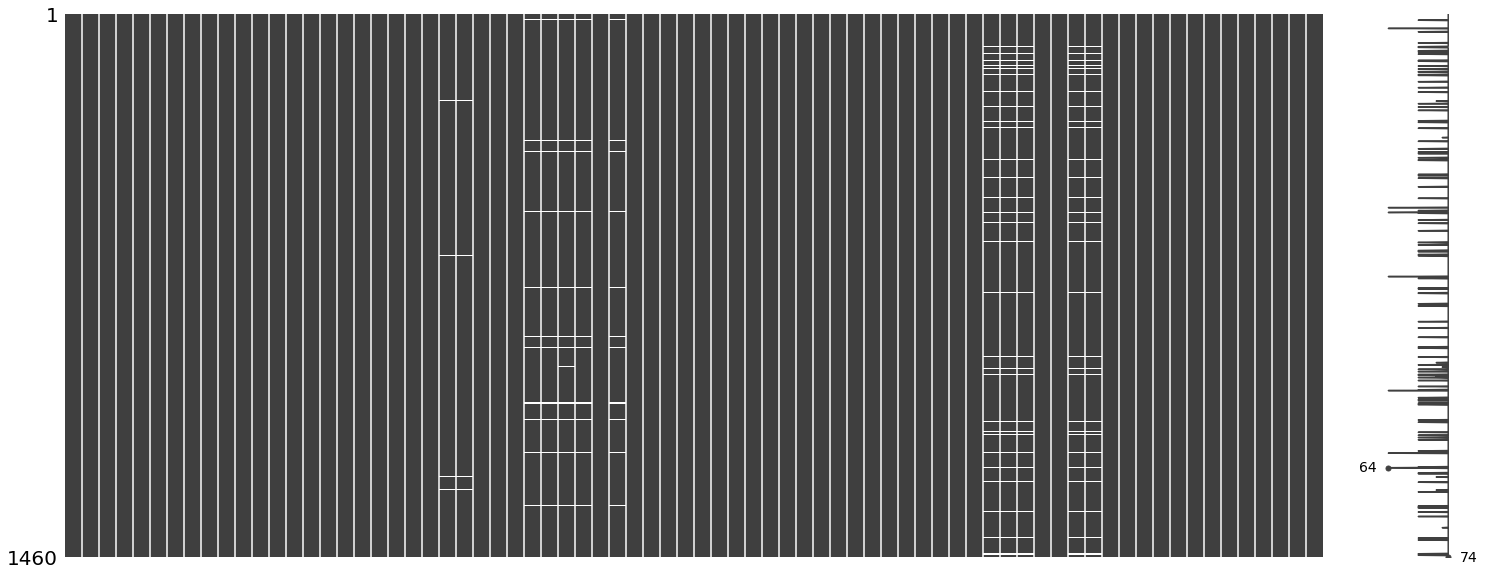

In [25]:
import missingno as ms
ms.matrix(df)

In [26]:
df.isna().sum(axis=1).value_counts()

0     1338
5      104
2        8
10       7
1        3
dtype: int64

In [27]:
null_cols = list(only_nulls.index)
null_cols

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [28]:
df[null_cols].nunique()

MasVnrType        4
MasVnrArea      327
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Electrical        5
GarageType        6
GarageYrBlt      97
GarageFinish      3
GarageQual        5
GarageCond        5
dtype: int64

In [29]:
null_modes = dict(df[null_cols].mode())
null_modes

{'MasVnrType': 0    None
 Name: MasVnrType, dtype: object,
 'MasVnrArea': 0   0.000
 Name: MasVnrArea, dtype: float64,
 'BsmtQual': 0    TA
 Name: BsmtQual, dtype: object,
 'BsmtCond': 0    TA
 Name: BsmtCond, dtype: object,
 'BsmtExposure': 0    No
 Name: BsmtExposure, dtype: object,
 'BsmtFinType1': 0    Unf
 Name: BsmtFinType1, dtype: object,
 'BsmtFinType2': 0    Unf
 Name: BsmtFinType2, dtype: object,
 'Electrical': 0    SBrkr
 Name: Electrical, dtype: object,
 'GarageType': 0    Attchd
 Name: GarageType, dtype: object,
 'GarageYrBlt': 0   2005.000
 Name: GarageYrBlt, dtype: float64,
 'GarageFinish': 0    Unf
 Name: GarageFinish, dtype: object,
 'GarageQual': 0    TA
 Name: GarageQual, dtype: object,
 'GarageCond': 0    TA
 Name: GarageCond, dtype: object}

In [30]:
for col,mode in null_modes.items():
    df[col] = df[col].fillna(mode[0])
nulls= df.isna().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [31]:
import re
def clean_colnames(df_,rename = {'1':'One', '2':'Two', '3':'Three'}):
    """Removes characters incomatible with statsmodels formula OLS """
    
    df = df_.copy()
    
    ## Use Regex to find numbers at start of name
    starts_number = list(map(lambda x: re.findall(r"(^\d)(\w*)",x),df.columns))#[:][:]
    
    # Save the column names and starts_number results
    col_df = pd.DataFrame({'column':df.columns,
                 'number_col':starts_number}).explode('number_col')

    ## Make df of only  non-nulls
    cols_to_rename = col_df[col_df['number_col'].notnull()]
    
    # Separate the starts_number results
    cols_to_rename['number'] = cols_to_rename['number_col'].map(lambda x: x[0])
    cols_to_rename['name'] = cols_to_rename['number_col'].map(lambda x: x[1])

    
    ## Renaming dict
#     rename = {'1':'One', '2':'Two', '3':'Three'}

    ## Save new names
    new_names = cols_to_rename['number'].map(rename) + cols_to_rename['name']
    
    ## Make dict for renaming
    rename_cols = dict(zip(cols_to_rename['column'],new_names))
    
    return df.rename(rename_cols,axis=1)

In [32]:
df = clean_colnames(df)

In [33]:
cat_cols =df.select_dtypes('O').columns
df_ohe = pd.get_dummies(df,columns=cat_cols)
df_ohe

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,OnestFlrSF,TwondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,

In [34]:
def fix_ohe_colnames(df_ohe_):
    df_ohe = df_ohe_.copy()
    new_col_names = list(map(lambda x: x.replace('.','').replace(' ',''),df_ohe.columns))
    new_col_names = list(map(lambda x: x.replace('(','').replace(')',''),new_col_names))
    new_col_names= list(map(lambda x: x.replace('&',''),new_col_names))
    df_ohe.columns = new_col_names
    return df_ohe

## Baseline Model

In [35]:
df_ohe = fix_ohe_colnames(df_ohe)

In [36]:
df_ohe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,OnestFlrSF,TwondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_Call,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0

In [37]:
target

'SalePrice'

In [38]:
features = '+'.join(df_ohe.drop(columns=target).columns)
features[:100]

'MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+B'

In [39]:
formula = target + '~'+features
formula

'SalePrice~MSSubClass+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+OnestFlrSF+TwondFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+MSZoning_Call+MSZoning_FV+MSZoning_RH+MSZoning_RL+MSZoning_RM+Street_Grvl+Street_Pave+LotShape_IR1+LotShape_IR2+LotShape_IR3+LotShape_Reg+LandContour_Bnk+LandContour_HLS+LandContour_Low+LandContour_Lvl+Utilities_AllPub+Utilities_NoSeWa+LotConfig_Corner+LotConfig_CulDSac+LotConfig_FR2+LotConfig_FR3+LotConfig_Inside+LandSlope_Gtl+LandSlope_Mod+LandSlope_Sev+Neighborhood_Blmngtn+Neighborhood_Blueste+Neighborhood_BrDale+Neighborhood_BrkSide+Neighborhood_ClearCr+Neighborhood_CollgCr+Neighborhood_Crawfor+Neighborhood_Edwards+Neighborhood_Gilbert+Neighborhood_IDOTRR+Neighborhood_MeadowV+Neighborhood_M

In [40]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:34:55   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

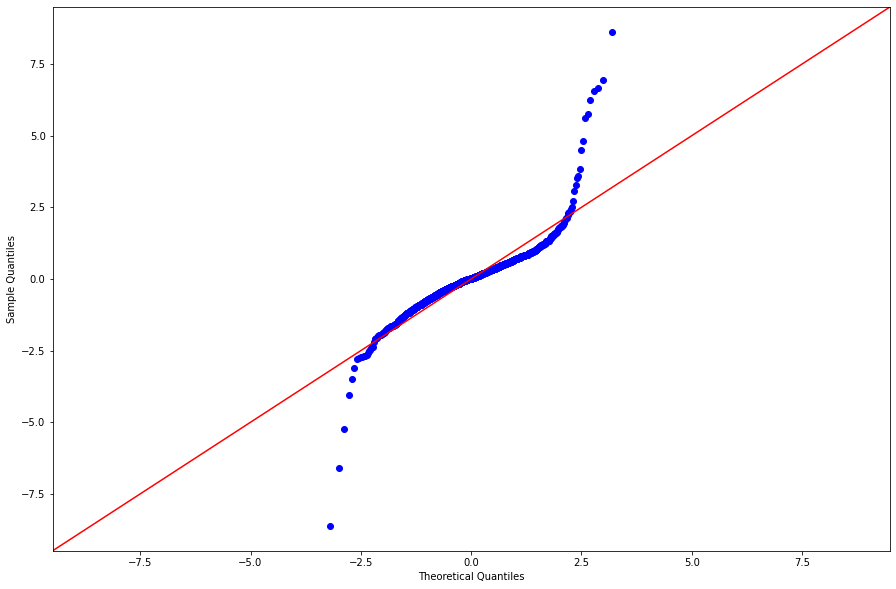

In [41]:
model = smf.ols(formula, df_ohe).fit()
display(model.summary())
fig = sm.graphics.qqplot(model.resid,fit=True, line='45')

# 📅 08/26/20: Adding Proper Diagnostic and Modeling Functions

### def `make_model`

In [42]:
def make_model(df_ohe,target="SalePrice",drop_cols=[]):
    ## Remove Drop Cols
    df_ohe = fix_ohe_colnames(df_ohe)
    
    ## Remove Drop cols (if present)
    for col in drop_cols:
         if col in df_ohe.columns:
            df_ohe.drop(col,axis=1,inplace=True) 
            

    f = target + '~' +  ' + '.join(df_ohe.drop(target,axis=1).columns)
    model = model = smf.ols(f,df_ohe).fit()
    return model

### def `diagnose_model`

In [70]:
def diagnose_model(model,y_true=None,show_summary=True):
    from scipy import stats
    import statsmodels.api as sm
    ## SHow summary 
    if show_summary:
        display(model.summary())
        
    ## Get Model Residuals 
    resids = model.resid
    y_pred = model.predict()
    
    ## Create PLot
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    
    ## QQ PLOT
    sm.graphics.qqplot(resids, stats.distributions.norm,
              fit=True, line='45',ax=ax[0])
    ax[0].set_title('QQ Plot of Model Residuals')
    
    
    ## RESIDUAL PLOT for Homoskedasticity
    
    ## Create xs for resid plot. Defaults to model predictions
    if y_true is None:
        xs = y_pred#np.linspace(0,len(resids),len(resids))
        xlabel = 'Predicted Target Values'
        font_dict = dict(rotation = 0)

    else:
        xs = y_true
        xlabel = 'True Target Values'
        x_rot = 0
        font_dict = dict(rotation = 45,ha='right')
    
    ## Plot residuals
    ax[1].scatter(x=xs,y=resids)
    ax[1].axhline(0,color='k',zorder=-1)

    ax[1].set(ylabel='Residuals',title='Homoskedasticity Check',
              xlabel=xlabel)
    
    
    ## Clean up plot
    plt.tight_layout()
    plt.show()
    
    
    ## Test model.resid normality
    res = stats.normaltest(resids)
#     print(res)
    sig = res[1] < .05
    sig_str = "ARE NOT" if sig else "ARE" 
    print(f"Residual Normality Test Results:")
    print('\t',res)

    print(f"\tp <.05? {sig}, therefore model residisuals {sig_str} normally distributed.")
    
#     return fig,ax 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:41:46   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

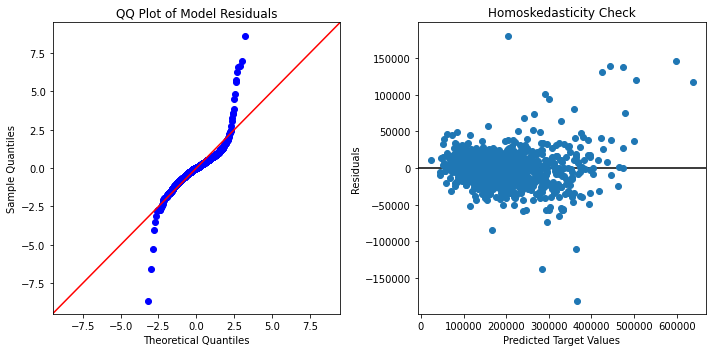

Residual Normality Test Results:
	 NormaltestResult(statistic=447.2197847296571, pvalue=7.717162530316525e-98)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [71]:
model = make_model(df_ohe)
diagnose_model(model)

## Baseline  Model - with Diagnostic Function

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:36:55   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

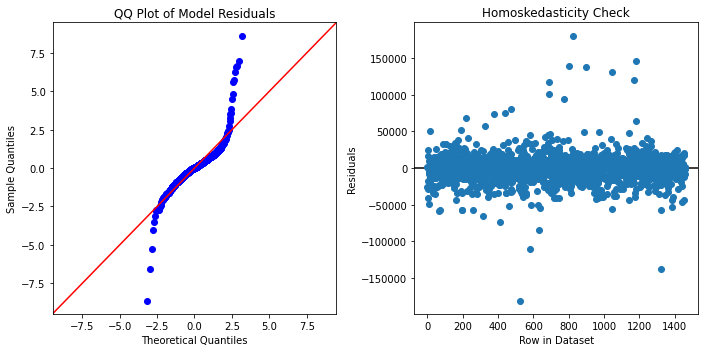

Residual Normality Test Results:
	 NormaltestResult(statistic=447.2197847296571, pvalue=7.717162530316525e-98)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [46]:
model = make_model(df_ohe)
diagnose_model(model)

### Removing Features with High P-Values

In [47]:
model.pvalues

Intercept               0.820
MSSubClass              0.632
LotArea                 0.000
OverallQual             0.000
OverallCond             0.000
                         ... 
SaleCondition_AdjLand   0.899
SaleCondition_Alloca    0.874
SaleCondition_Family    0.682
SaleCondition_Normal    0.938
SaleCondition_Partial   0.685
Length: 270, dtype: float64

In [48]:
pvalues = model.pvalues.rename('p-values')
pvalues.sort_values(ascending=False)

Condition1_PosA      0.998
GarageType_Detchd    0.998
Condition1_RRNn      0.996
ExterCond_Po         0.996
GarageType_Basment   0.993
                      ... 
OverallQual          0.000
OverallCond          0.000
LotArea              0.000
Condition2_PosN      0.000
RoofMatl_ClyTile     0.000
Name: p-values, Length: 270, dtype: float64

In [49]:
pvalues[ pvalues > .05]

Intercept               0.820
MSSubClass              0.632
YearRemodAdd            0.106
BsmtFinSF2              0.341
BsmtUnfSF               0.194
                         ... 
SaleCondition_AdjLand   0.899
SaleCondition_Alloca    0.874
SaleCondition_Family    0.682
SaleCondition_Normal    0.938
SaleCondition_Partial   0.685
Name: p-values, Length: 233, dtype: float64

In [50]:
bad_pvals_coeffs = list(pvalues[ pvalues > .05].index)
bad_pvals_coeffs[:5]

['Intercept', 'MSSubClass', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF']

In [51]:
for coeff in ['const','Intercept']:
    if coeff in bad_pvals_coeffs:
        bad_pvals_coeffs.remove(coeff) 
bad_pvals_coeffs[:5]

['MSSubClass', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF']

In [52]:
len(bad_pvals_coeffs) / len(df_ohe.columns)

0.8592592592592593

In [53]:
def get_bad_coeffs_list(model):
    pvalues = model.pvalues.rename('p-values')
    pvalues.sort_values(ascending=False,inplace=True)
    bad_pvals_coeffs = list(pvalues[ pvalues > .05].index)
    
    for coeff in ['const','Intercept']:
        if coeff in bad_pvals_coeffs:
            bad_pvals_coeffs.remove(coeff) 
    return bad_pvals_coeffs

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     72.19
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:37:01   Log-Likelihood:                -16598.
No. Observations:                1460   AIC:                         3.365e+04
Df Residuals:                    1231   BIC:                         3.487e+04
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.602e+04   1.14e+05     -0.227      0.820    -2.5e+05    1.98e+05
MSSubClass              -39.6014     82.771     -0.478      0.632    -201.988     122.786
LotArea                   0.7684      0.108      7.117      0.000       0.557       0.980
OverallQual            6390.4599   1009.801      6.328      0.000    4409.339    8371.581
OverallCond            5678.6007    871.560      6.515      0.000    3968.694    7388.508
YearBuilt               302.1677     75.569      3.999      0.000     153.909     450.426
YearRemodAdd             89.5523     55.336      1.618      0.106     -19.012     198.116
MasVnrArea               20.1096      5.768      3.487      0.001       8.794      31.425
BsmtFinSF1               15.9419      2.829      5.636      0.000      10.392      21.492
BsmtFinSF2                5.5806      5.864      0.952      0.341      -5.924      17.085
BsmtUnfSF                -3.4227      2.632     -1.300      0.194      -8.587       1.741
TotalBsmtSF              18.0998      3.500      5.171      0.000      11.233      24.967
OnestFlrSF               17.8695      6.028      2.965      0.003       6.044      29.695
TwondFlrSF               33.3626      5.364      6.220      0.000      22.840      43.886
LowQualFinSF            -17.5331     13.424     -1.306      0.192     -43.870       8.804
GrLivArea                33.6991      5.408      6.231      0.000      23.089      44.309
BsmtFullBath            609.7087   1973.041      0.309      0.757   -3261.187    4480.605
BsmtHalfBath           -811.0441   3024.000     -0.268      0.789   -6743.808    5121.720
FullBath               3676.7059   2205.598      1.667      0.096    -650.440    8003.852
HalfBath                961.7982   2089.855      0.460      0.645   -3138.273    5061.869
BedroomAbvGr          -3357.0053   1360.678     -2.467      0.014   -6026.509    -687.501
KitchenAbvGr           -1.25e+04   5670.298     -2.205      0.028   -2.36e+04   -1377.275
TotRmsAbvGrd           1066.2613    942.230      1.132      0.258    -782.294    2914.817
Fireplaces             2532.7965   1336.645      1.895      0.058     -89.558    5155.151
GarageYrBlt              38.6712     48.064      0.805      0.421     -55.625     132.967
GarageCars             3334.9722   2213.359      1.507      0.132   -1007.402    7677.346
GarageArea               14.1946      7.672      1.850      0.065      -0.856      29.246
WoodDeckSF               12.7372      5.818      2.189      0.029       1.322      24.152
OpenPorchSF               5.7418     11.436      0.502      0.616     -16.694      28.177
EnclosedPorch             5.0366     12.380      0.407      0.684     -19.252      29.325
ThreeSsnPorch            34.7985     22.394      1.554      0.120      -9.136      78.733
ScreenPorch            

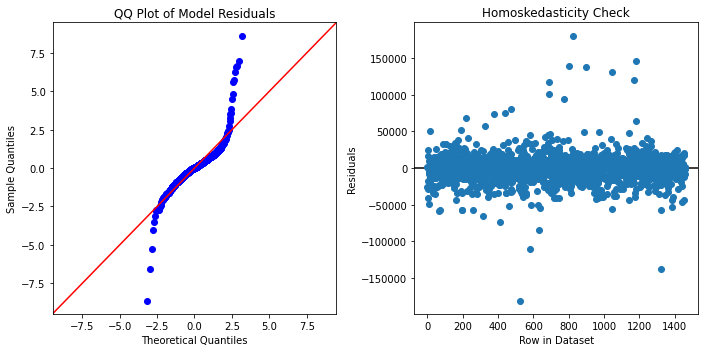

Residual Normality Test Results:
	 NormaltestResult(statistic=447.2197847296571, pvalue=7.717162530316525e-98)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [54]:
model= make_model(df_ohe,drop_cols=[])
diagnose_model(model)

In [55]:
bad_coeffs = get_bad_coeffs_list(model)
bad_coeffs

['Condition1_PosA',
 'GarageType_Detchd',
 'Condition1_RRNn',
 'ExterCond_Po',
 'GarageType_Basment',
 'Exterior2nd_Plywood',
 'BsmtFinType1_GLQ',
 'MSZoning_RL',
 'Condition1_RRAn',
 'Foundation_CBlock',
 'Exterior1st_AsphShn',
 'Neighborhood_Somerst',
 'ExterQual_Fa',
 'Exterior1st_BrkComm',
 'LandContour_HLS',
 'Electrical_FuseP',
 'BldgType_2fmCon',
 'Street_Pave',
 'ExterCond_Ex',
 'Exterior1st_Stone',
 'Utilities_AllPub',
 'Neighborhood_Blueste',
 'Condition1_Feedr',
 'LandContour_Lvl',
 'MSZoning_RH',
 'MasVnrType_Stone',
 'Heating_Floor',
 'HeatingQC_Po',
 'Foundation_PConc',
 'Heating_GasA',
 'Exterior1st_WdShing',
 'SaleCondition_Normal',
 'HouseStyle_SLvl',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Stucco',
 'HouseStyle_SFoyer',
 'LotConfig_Corner',
 'BsmtFinType1_Unf',
 'Exterior2nd_BrkCmn',
 'MiscVal',
 'BsmtFinType2_GLQ',
 'LandSlope_Gtl',
 'BldgType_Duplex',
 'SaleType_CWD',
 'Exterior1st_CemntBd',
 'GarageType_CarPort',
 'SaleCondition_AdjLand',
 'GarageType_Attchd',
 'Foun

### Final Baseline Model with Bad p-values removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     260.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:37:53   Log-Likelihood:                -17047.
No. Observations:                1460   AIC:                         3.417e+04
Df Residuals:                    1422   BIC:                         3.437e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.056e+06   7.93e+04    -13.311      0.000   -1.21e+06   -9.01e+05
LotArea                  0.6186      0.083      7.462      0.000       0.456       0.781
OverallQual           1.238e+04    989.640     12.513      0.000    1.04e+04    1.43e+04
OverallCond           6786.4908    783.874      8.658      0.000    5248.816    8324.165
YearBuilt              509.8573     37.505     13.594      0.000     436.285     583.429
MasVnrArea              22.6469      5.113      4.429      0.000      12.616      32.677
BsmtFinSF1              20.1317      2.096      9.603      0.000      16.019      24.244
TotalBsmtSF             18.7204      3.543      5.284      0.000      11.770      25.670
OnestFlrSF              77.8254     17.453      4.459      0.000      43.588     112.063
TwondFlrSF              66.3630     17.139      3.872      0.000      32.743      99.983
GrLivArea               -0.6693     16.935     -0.040      0.968     -33.889      32.551
BedroomAbvGr         -5934.0530   1249.683     -4.748      0.000   -8385.474   -3482.632
KitchenAbvGr         -1.991e+04   3859.336     -5.158      0.000   -2.75e+04   -1.23e+04
WoodDeckSF               9.0755      6.633      1.368      0.171      -3.936      22.087
ScreenPorch             31.0314     14.224      2.182      0.029       3.130      58.933
PoolArea                84.5237     20.442      4.135      0.000      44.424     124.624
Neighborhood_Crawfor  1.877e+04   4409.605      4.257      0.000    1.01e+04    2.74e+04
Neighborhood_Edwards -4427.8338   3224.338     -1.373      0.170   -1.08e+04    1897.136
Neighborhood_Mitchel -1.092e+04   4362.548     -2.502      0.012   -1.95e+04   -2357.699
Neighborhood_NAmes   -5909.3122   2372.807     -2.490      0.013   -1.06e+04   -1254.734
Neighborhood_NWAmes  -1.975e+04   3678.115     -5.370      0.000    -2.7e+04   -1.25e+04
Neighborhood_NoRidge  2.778e+04   5196.385      5.347      0.000    1.76e+04     3.8e+04
Neighborhood_NridgHt   4.47e+04   3924.273     11.390      0.000     3.7e+04    5.24e+04
Neighborhood_StoneBr  4.358e+04   6143.543      7.093      0.000    3.15e+04    5.56e+04
Condition2_Norm      -4846.1730   8931.684     -0.543      0.588   -2.24e+04    1.27e+04
Condition2_PosA       2.829e+04   3.06e+04      0.924      0.356   -3.18e+04    8.83e+04
Condition2_PosN      -2.104e+05    2.3e+04     -9.145      0.000   -2.56e+05   -1.65e+05
Condition2_RRAe      -8.608e+04   4.46e+04     -1.932      0.054   -1.73e+05    1321.742
RoofStyle_Shed        4.731e+04   3.26e+04      1.452      0.147   -1.66e+04    1.11e+05
RoofMatl_ClyTile     -6.709e+05   4.45e+04    -15.079      0.000   -7.58e+05   -5.84e+05
RoofMatl_CompShg      8327.9660   2.93e+04      0.285      0.776   -4.91e+04    6.57e+04
RoofMatl_Membran      4.328e+04   4.13e+04      1.049    

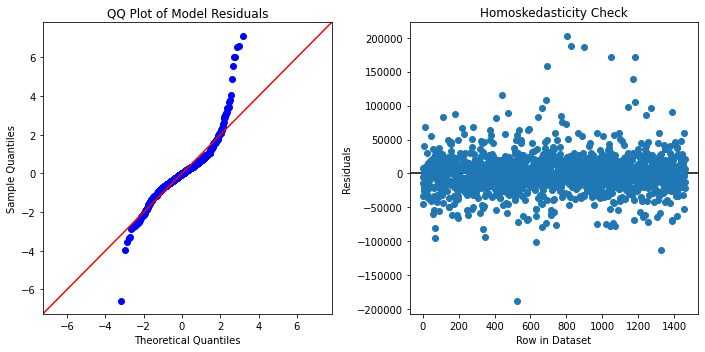

Residual Normality Test Results:
	 NormaltestResult(statistic=410.67758554702385, pvalue=6.645006005667136e-90)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [56]:
model = make_model(df_ohe,drop_cols=bad_coeffs)
diagnose_model(model)

In [57]:
bad_coeffs2 = get_bad_coeffs_list(model)
bad_coeffs2

['GrLivArea',
 'RoofMatl_TarGrv',
 'RoofMatl_CompShg',
 'Condition2_Norm',
 'RoofMatl_Metal',
 'RoofMatl_WdShake',
 'Condition2_PosA',
 'RoofMatl_Membran',
 'WoodDeckSF',
 'Neighborhood_Edwards',
 'RoofStyle_Shed',
 'Condition2_RRAe',
 'RoofMatl_WdShngl']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     393.7
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:37:54   Log-Likelihood:                -17065.
No. Observations:                1460   AIC:                         3.418e+04
Df Residuals:                    1435   BIC:                         3.431e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.034e+06   7.18e+04    -14.404      0.000   -1.17e+06   -8.93e+05
LotArea                  0.6648      0.082      8.079      0.000       0.503       0.826
OverallQual           1.294e+04    979.017     13.222      0.000     1.1e+04    1.49e+04
OverallCond           6851.9472    780.537      8.779      0.000    5320.832    8383.063
YearBuilt              498.4398     36.415     13.688      0.000     427.008     569.872
MasVnrArea              22.4920      5.128      4.386      0.000      12.432      32.552
BsmtFinSF1              20.6615      2.095      9.862      0.000      16.552      24.771
TotalBsmtSF             20.8901      3.514      5.945      0.000      13.998      27.783
OnestFlrSF              75.6598      3.964     19.088      0.000      67.884      83.435
TwondFlrSF              66.2484      2.804     23.629      0.000      60.749      71.748
BedroomAbvGr         -6496.0098   1231.518     -5.275      0.000   -8911.778   -4080.242
KitchenAbvGr         -1.946e+04   3793.839     -5.129      0.000   -2.69e+04    -1.2e+04
ScreenPorch             22.6686     14.184      1.598      0.110      -5.154      50.491
PoolArea                78.3898     20.297      3.862      0.000      38.575     118.204
Neighborhood_Crawfor  1.843e+04   4394.479      4.194      0.000    9811.146    2.71e+04
Neighborhood_Mitchel -1.023e+04   4372.225     -2.340      0.019   -1.88e+04   -1653.971
Neighborhood_NAmes   -5596.1987   2311.580     -2.421      0.016   -1.01e+04   -1061.762
Neighborhood_NWAmes  -1.866e+04   3676.487     -5.075      0.000   -2.59e+04   -1.14e+04
Neighborhood_NoRidge  2.904e+04   5220.891      5.563      0.000    1.88e+04    3.93e+04
Neighborhood_NridgHt  4.409e+04   3937.909     11.197      0.000    3.64e+04    5.18e+04
Neighborhood_StoneBr  4.294e+04   6171.712      6.957      0.000    3.08e+04     5.5e+04
Condition2_PosN      -2.111e+05   2.12e+04     -9.959      0.000   -2.53e+05    -1.7e+05
RoofMatl_ClyTile     -6.922e+05   3.36e+04    -20.583      0.000   -7.58e+05   -6.26e+05
GarageQual_Ex         1.568e+05      3e+04      5.219      0.000    9.79e+04    2.16e+05
GarageCond_Ex        -1.426e+05   3.64e+04     -3.913      0.000   -2.14e+05   -7.11e+04
==============================================================================
Omnibus:                      441.386   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5960.377
Skew:                           1.019   Prob(JB):                         0.00
Kurtosis:                      12.686   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condit

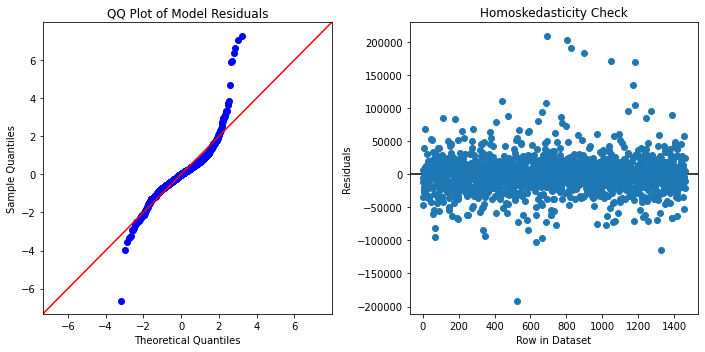

Residual Normality Test Results:
	 NormaltestResult(statistic=441.385597439407, pvalue=1.4267087351205615e-96)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [58]:
model = make_model(df_ohe,drop_cols=[*bad_coeffs,*bad_coeffs2])
diagnose_model(model)

# iNTERPRET

- Our Model has indications of multicollinearity issues that we have yet to address. 
- Additionally, we have yet to remove outliers, which may explain the tails of our QQ-Plot. 


- Will now remove outliers, address multicollinearity, and then produce second Model.

# Addressing Multicollinearity

## 📅 08/25/20 Office Hours

In [59]:
corr = df.corr().abs()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx] = True

<AxesSubplot:>

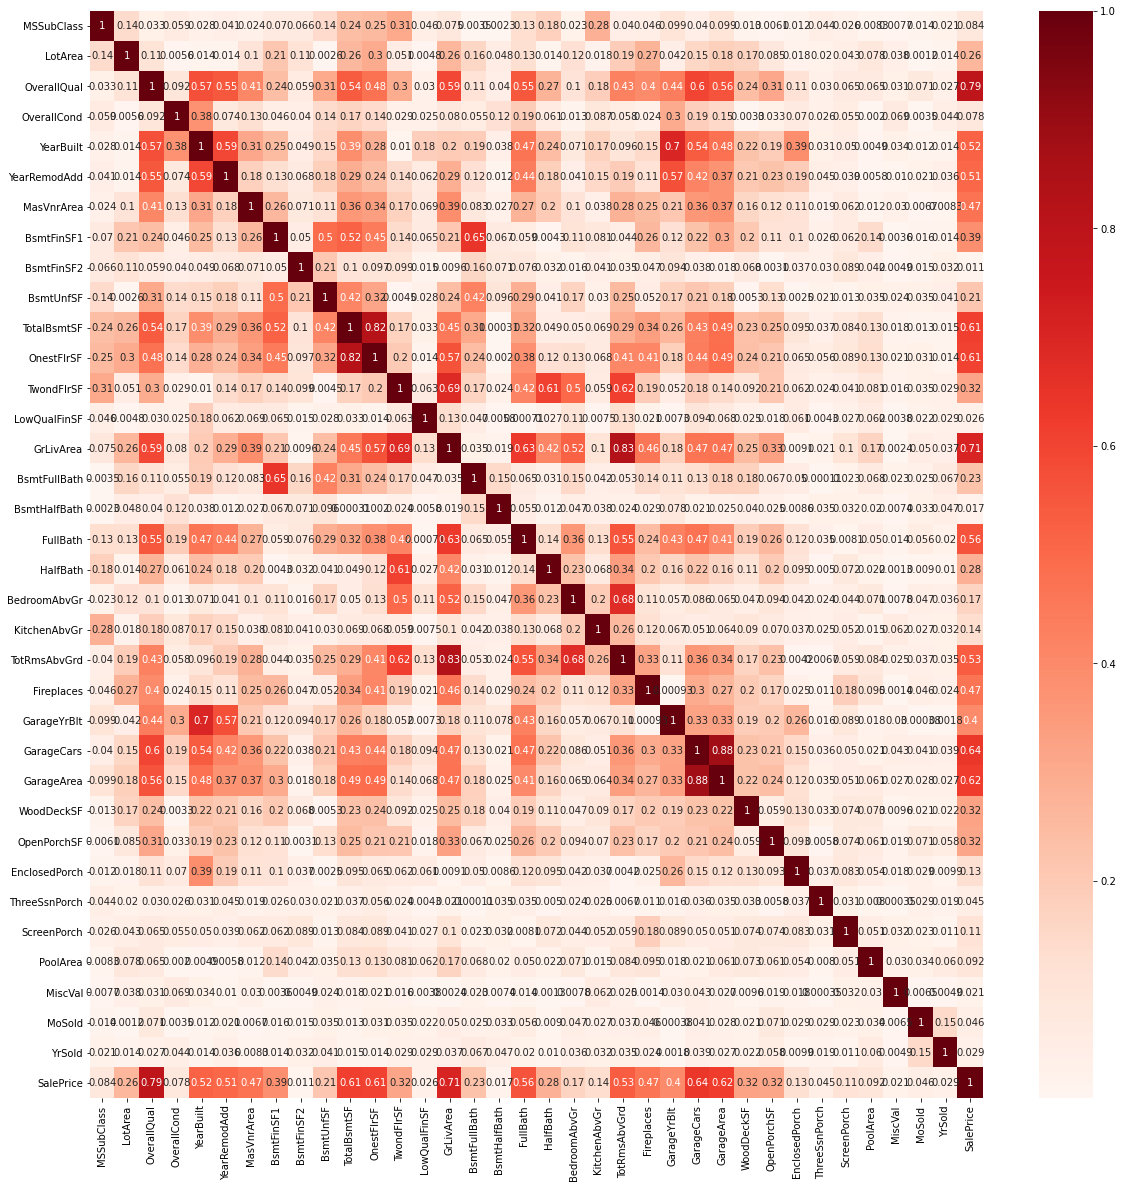

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap= 'Reds')

(<Figure size 1800x1800 with 2 Axes>, <AxesSubplot:>)

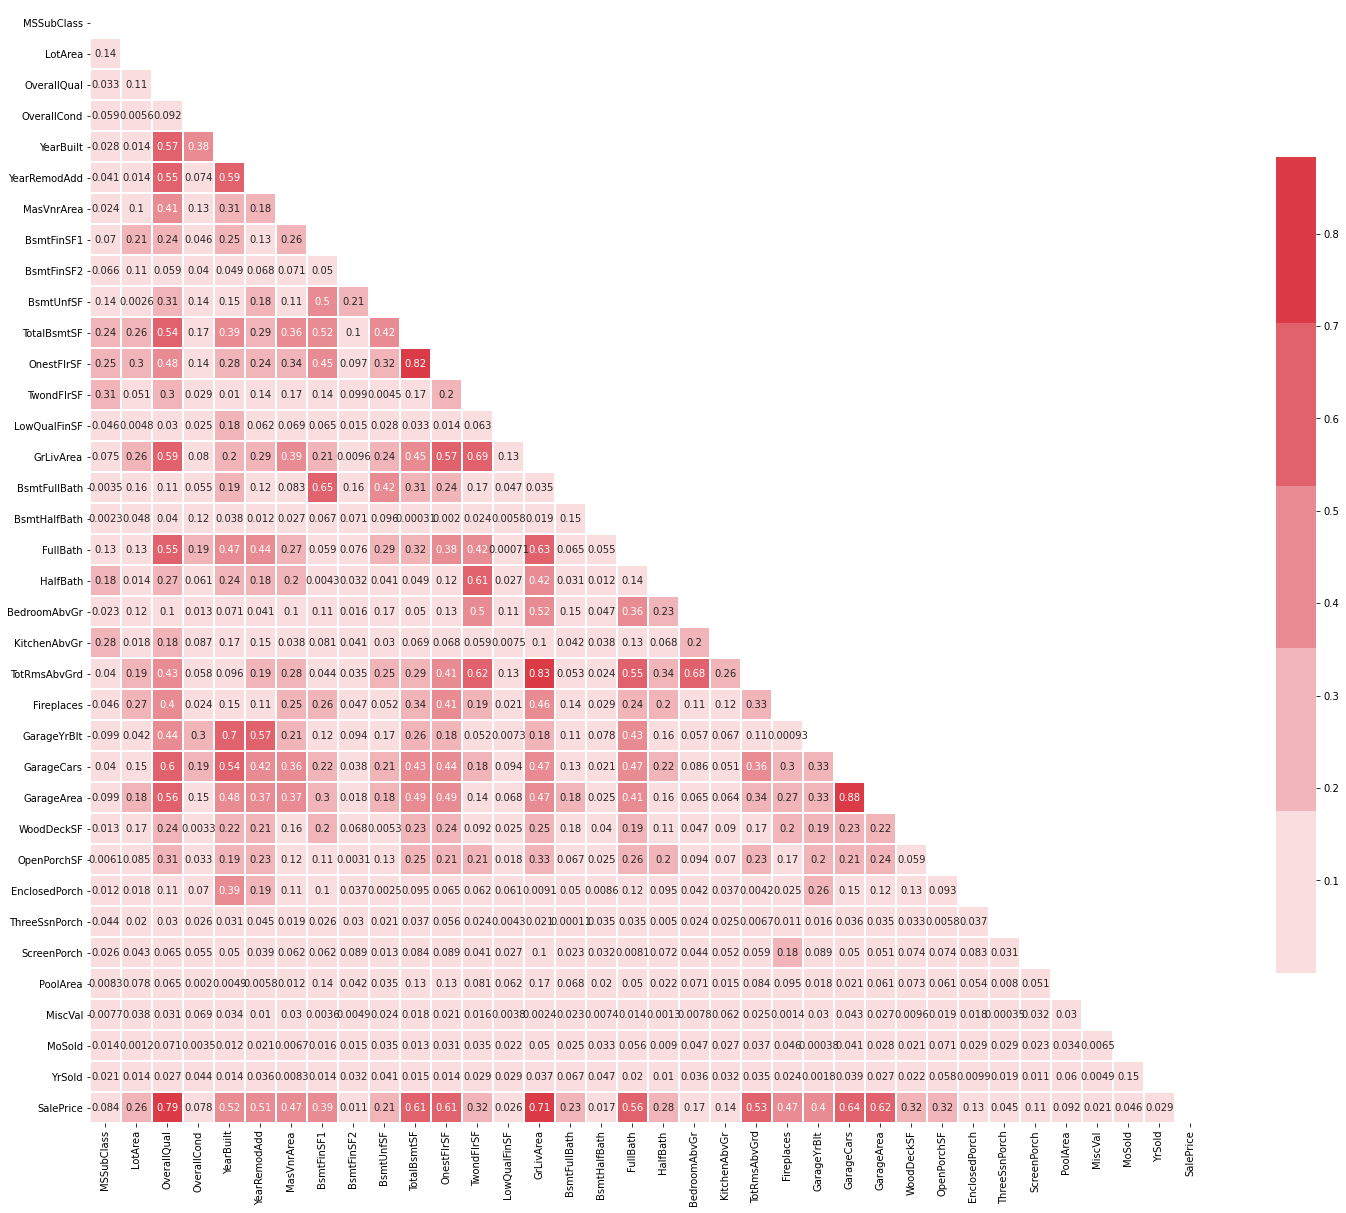

In [61]:
def plot_correlation(corr,figsize=(25,25)):
    ## Get Correlation Matrix
    corr = np.abs(corr)
    
    ## Create Fig,Ax
    fig,ax = plt.subplots(figsize=figsize)
    
    ## Get Mask to cover upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask,k=0)] = True
    
    ## Make heatmap 
    sns.heatmap(corr,mask=mask,cmap=sns.diverging_palette(240, 10, n=10),
               annot=True,center=0,ax=ax,linewidths=1 
                ,square=True, cbar_kws={'shrink':0.6})
    return fig,ax

corr = df.corr()
plot_correlation(corr)

In [62]:
corr['SalePrice'].sort_values()

KitchenAbvGr    -0.136
EnclosedPorch   -0.129
MSSubClass      -0.084
OverallCond     -0.078
YrSold          -0.029
LowQualFinSF    -0.026
MiscVal         -0.021
BsmtHalfBath    -0.017
BsmtFinSF2      -0.011
ThreeSsnPorch    0.045
MoSold           0.046
PoolArea         0.092
ScreenPorch      0.111
BedroomAbvGr     0.168
BsmtUnfSF        0.214
BsmtFullBath     0.227
LotArea          0.264
HalfBath         0.284
OpenPorchSF      0.316
TwondFlrSF       0.319
WoodDeckSF       0.324
BsmtFinSF1       0.386
GarageYrBlt      0.398
Fireplaces       0.467
MasVnrArea       0.473
YearRemodAdd     0.507
YearBuilt        0.523
TotRmsAbvGrd     0.534
FullBath         0.561
OnestFlrSF       0.606
TotalBsmtSF      0.614
GarageArea       0.623
GarageCars       0.640
GrLivArea        0.709
OverallQual      0.791
SalePrice        1.000
Name: SalePrice, dtype: float64

### VIF


In [63]:
X = df_ohe.drop('SalePrice',axis=1)
X = sm.add_constant(X)
X

,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,OnestFlrSF,TwondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_Call,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,...,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000,60,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.000,20,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.000,60,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [66]:
vif_results = pd.Series(dict(zip(X.columns, vif)))
vif_results.value_counts()

inf       242
1.609       1
7.541       1
3.046       1
1.461       1
1.315       1
1.391       1
4.375       1
3.454       1
1.605       1
2.081       1
7.669       1
3.096       1
1.226       1
2.637       1
3.256       1
1.513       1
1.318       1
3.966       1
4.138       1
1.208       1
6.574       1
5.467       1
3.658       1
14.601      1
2.938       1
1.491       1
34.360      1
0.000       1
dtype: int64

In [67]:
vif_results=vif_results.loc[~(vif_results==np.inf)]

In [68]:
vif_results.sort_values(ascending=False)

MSSubClass      34.360
YearBuilt       14.601
GarageCars       7.669
GarageArea       7.541
TotRmsAbvGrd     6.574
OverallQual      5.467
KitchenAbvGr     4.375
FullBath         4.138
GarageYrBlt      3.966
YearRemodAdd     3.658
BedroomAbvGr     3.454
LotArea          3.256
HalfBath         3.096
MasVnrArea       3.046
BsmtFullBath     2.938
OverallCond      2.637
Fireplaces       2.081
OpenPorchSF      1.609
EnclosedPorch    1.605
PoolArea         1.513
WoodDeckSF       1.491
BsmtHalfBath     1.461
MiscVal          1.391
ScreenPorch      1.318
YrSold           1.315
MoSold           1.226
ThreeSsnPorch    1.208
const            0.000
dtype: float64

# 👥 Tests for Homoscedasticity

- Group B One on Ones - 08/26/20
- [Blog Post:Tests for heteroscedasticity](https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     393.7
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:46:30   Log-Likelihood:                -17065.
No. Observations:                1460   AIC:                         3.418e+04
Df Residuals:                    1435   BIC:                         3.431e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.034e+06   7.18e+04    -14.404      0.000   -1.17e+06   -8.93e+05
LotArea                  0.6648      0.082      8.079      0.000       0.503       0.826
OverallQual           1.294e+04    979.017     13.222      0.000     1.1e+04    1.49e+04
OverallCond           6851.9472    780.537      8.779      0.000    5320.832    8383.063
YearBuilt              498.4398     36.415     13.688      0.000     427.008     569.872
MasVnrArea              22.4920      5.128      4.386      0.000      12.432      32.552
BsmtFinSF1              20.6615      2.095      9.862      0.000      16.552      24.771
TotalBsmtSF             20.8901      3.514      5.945      0.000      13.998      27.783
OnestFlrSF              75.6598      3.964     19.088      0.000      67.884      83.435
TwondFlrSF              66.2484      2.804     23.629      0.000      60.749      71.748
BedroomAbvGr         -6496.0098   1231.518     -5.275      0.000   -8911.778   -4080.242
KitchenAbvGr         -1.946e+04   3793.839     -5.129      0.000   -2.69e+04    -1.2e+04
ScreenPorch             22.6686     14.184      1.598      0.110      -5.154      50.491
PoolArea                78.3898     20.297      3.862      0.000      38.575     118.204
Neighborhood_Crawfor  1.843e+04   4394.479      4.194      0.000    9811.146    2.71e+04
Neighborhood_Mitchel -1.023e+04   4372.225     -2.340      0.019   -1.88e+04   -1653.971
Neighborhood_NAmes   -5596.1987   2311.580     -2.421      0.016   -1.01e+04   -1061.762
Neighborhood_NWAmes  -1.866e+04   3676.487     -5.075      0.000   -2.59e+04   -1.14e+04
Neighborhood_NoRidge  2.904e+04   5220.891      5.563      0.000    1.88e+04    3.93e+04
Neighborhood_NridgHt  4.409e+04   3937.909     11.197      0.000    3.64e+04    5.18e+04
Neighborhood_StoneBr  4.294e+04   6171.712      6.957      0.000    3.08e+04     5.5e+04
Condition2_PosN      -2.111e+05   2.12e+04     -9.959      0.000   -2.53e+05    -1.7e+05
RoofMatl_ClyTile     -6.922e+05   3.36e+04    -20.583      0.000   -7.58e+05   -6.26e+05
GarageQual_Ex         1.568e+05      3e+04      5.219      0.000    9.79e+04    2.16e+05
GarageCond_Ex        -1.426e+05   3.64e+04     -3.913      0.000   -2.14e+05   -7.11e+04
==============================================================================
Omnibus:                      441.386   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5960.377
Skew:                           1.019   Prob(JB):                         0.00
Kurtosis:                      12.686   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condit

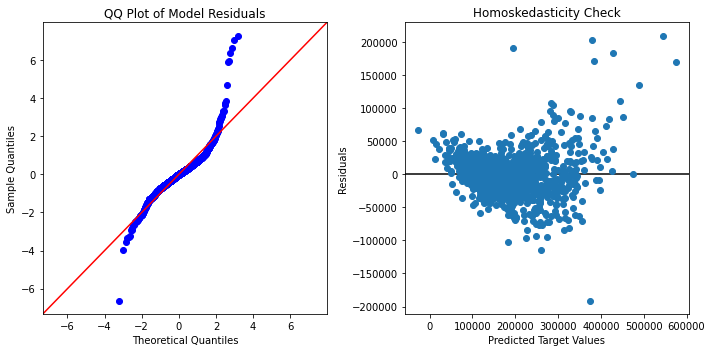

Residual Normality Test Results:
	 NormaltestResult(statistic=441.385597439407, pvalue=1.4267087351205615e-96)
	p <.05? True, therefore model residisuals ARE NOT normally distributed.


In [80]:
model = make_model(df_ohe,drop_cols=[*bad_coeffs,*bad_coeffs2])
diagnose_model(model)

In [89]:
df_ohe.drop(columns=[*bad_coeffs,*bad_coeffs2,*bad_pvals_coeffs]).shape

(1460, 25)

In [95]:
exog = pd.DataFrame(model.model.exog,columns=model.params.index)
exog

,Intercept,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,OnestFlrSF,TwondFlrSF,BedroomAbvGr,KitchenAbvGr,ScreenPorch,PoolArea,Neighborhood_Crawfor,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition2_PosN,RoofMatl_ClyTile,GarageQual_Ex,GarageCond_Ex
0,1.000,8450.000,7.000,5.000,2003.000,196.000,706.000,856.000,856.000,854.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1.000,9600.000,6.000,8.000,1976.000,0.000,978.000,1262.000,1262.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.000,11250.000,7.000,5.000,2001.000,162.000,486.000,920.000,920.000,866.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,1.000,9550.000,7.000,5.000,1915.000,0.000,216.000,756.000,961.000,756.000,3.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1.000,14260.000,8.000,5.000,2000.000,350.000,655.000,1145.000,1145.000,1053.000,4.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.000,7917.000,6.000,5.000,1999.000,0.000,0.000,953.000,953.000,694.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1456,1.000,13175.000,6.000,6.000,1978.000,119.000,790.000,1542.000,2073.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1457,1.000,9042.000,7.000,9.000,1941.000,0.000,275.000,1152.000,1188.000,1152.000,4.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1458,1.000,9717.000,5.000,6.000,1950.000,0.000,49.000,1078.000,1078.000,0.000,2.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [96]:
# exog = model.model.exog
# exog

In [90]:
model.model.exog.shape

(1460, 25)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:693: RuntimeWarning:

invalid value encountered in sqrt



,value
Lagrange multiplier statistic,538.046
p-value,0.000
f-value,34.894
f p-value,0.000


,value
F statistic,1.008
p-value,0.919


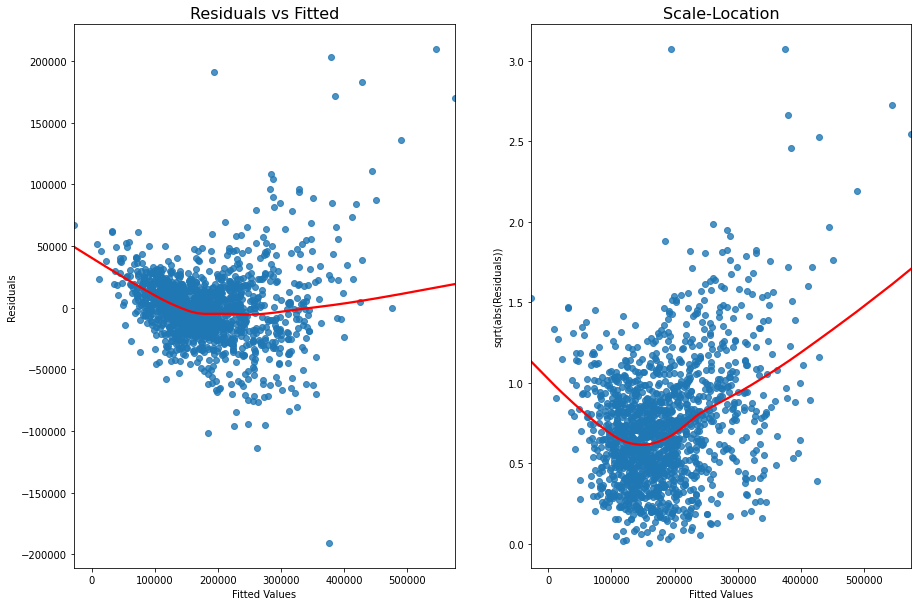

In [102]:
## Source: https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0

import statsmodels.stats.api as sms
## Get Residuals, and Predicted Values
resids = model.resid
fitted_vals = model.predict()

resids_standardized = model.get_influence().resid_studentized_internal

X_data = model.model.exog

fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

bp_test = pd.DataFrame(sms.het_breuschpagan(resids, X_data), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic',
                                  'p-value', 'f-value', 'f p-value'])

gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids,
                                              X_data,alternative='two-sided')[:-1],
                           columns=['value'],
                           index=['F statistic',
                                  'p-value'])

display(bp_test,gq_test.style.)

In [103]:
sms.het_goldfeldquandt(resids, X_data,alternative='two-sided')

(1.0076515314098353, 0.9193677094852718, 'two-sided')

In [100]:
sms.het_goldfeldquandt(resids,X_data,alternative='two-sided')

(1.0076515314098353, 0.9193677094852718, 'two-sided')

In [98]:
display(bp_test,gq_test)

,value
Lagrange multiplier statistic,538.046
p-value,0.000
f-value,34.894
f p-value,0.000


,value
F statistic,1.008
p-value,0.460


In [125]:
res_df = pd.DataFrame({'pvalues':model.pvalues,
              'coeffs':model.params,'sig':model.pvalues<.05})

,pvalues,coeffs,sig
Intercept,0.000,-1033626.005,True
LotArea,0.000,0.665,True
OverallQual,0.000,12944.261,True
OverallCond,0.000,6851.947,True
YearBuilt,0.000,498.440,True
MasVnrArea,0.000,22.492,True
BsmtFinSF1,0.000,20.662,True
TotalBsmtSF,0.000,20.890,True
OnestFlrSF,0.000,75.660,True
TwondFlrSF,0.000,66.248,True


In [120]:
summary = model.summary()
df_summary = summary.tables[1]
print(type(df_summary))
df_summary.data

<class 'statsmodels.iolib.table.SimpleTable'>


[['', 'coef', 'std err', 't', 'P>|t|', '[0.025', '0.975]'],
 ['Intercept',
  '-1.034e+06',
  ' 7.18e+04',
  '  -14.404',
  ' 0.000',
  '-1.17e+06',
  '-8.93e+05'],
 ['LotArea',
  '    0.6648',
  '    0.082',
  '    8.079',
  ' 0.000',
  '    0.503',
  '    0.826'],
 ['OverallQual',
  ' 1.294e+04',
  '  979.017',
  '   13.222',
  ' 0.000',
  '  1.1e+04',
  ' 1.49e+04'],
 ['OverallCond',
  ' 6851.9472',
  '  780.537',
  '    8.779',
  ' 0.000',
  ' 5320.832',
  ' 8383.063'],
 ['YearBuilt',
  '  498.4398',
  '   36.415',
  '   13.688',
  ' 0.000',
  '  427.008',
  '  569.872'],
 ['MasVnrArea',
  '   22.4920',
  '    5.128',
  '    4.386',
  ' 0.000',
  '   12.432',
  '   32.552'],
 ['BsmtFinSF1',
  '   20.6615',
  '    2.095',
  '    9.862',
  ' 0.000',
  '   16.552',
  '   24.771'],
 ['TotalBsmtSF',
  '   20.8901',
  '    3.514',
  '    5.945',
  ' 0.000',
  '   13.998',
  '   27.783'],
 ['OnestFlrSF',
  '   75.6598',
  '    3.964',
  '   19.088',
  ' 0.000',
  '   67.884',
  '   83.435'

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.